In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt,mean,log,diff
import csv
import powerlaw
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.api import graphics
from statsmodels.graphics.regressionplots import abline_plot
from statsmodels.formula.api import ols
from statsmodels.compat import lzip
%matplotlib inline
import scipy as sp
import random as rn
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

In [6]:
df= pd.read_csv('final.csv')
df.head(2)

,postcode,incorporationdate,IncorporationDate,SIC_2013,SIC2018,population,Males,Females,Density,latitude,...,companycatagory2018,population_log,SIC2013_log,SIC2018_log,Lives_House,Lives_communal,Area,Schoolchild,LivesSchoolchild,AreaUK
0,AB10 1BA,2008-12-08,2008-08-12,82990,82990,222793,110122,112671,12,57,...,0,12,11,11,214243,8550,18571,1530,1530,18571
1,AB10 1BA,2006-06-13,2006-06-13,58142,58142,222793,110122,112671,12,57,...,1,12,10,10,214243,8550,18571,1530,1530,18571


In [5]:
df_st= pd.read_csv('finalstartup13.csv')
df_st.head(2)

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC_2013,SIC2018,SICcombine,...,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID,company2013,company2018,companycatagory2013,companycatagory2018
0,AB10 1DQ,2010-07-12,Private Limited Company,Active,Private Limited Company,Active,2010-12-07,82990,82990,82990,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1
1,AB10 1DQ,2011-09-01,Private Limited Company,Active,Private Limited Company,Active,2011-01-09,56101,56101,56101,...,S01006585,S02001249,City Centre West - 04,City Centre West,Aberdeen City,2764.0,1,1,1,1


In [8]:
df_st1= pd.read_csv('finalstartup18.csv')
df_st1.head(2)

,postcode,incorporationdate,companycategory,companystatus,CompanyCategory,CompanyStatus,IncorporationDate,SIC_2013,SIC2018,SICcombine,...,lsoa11cd,msoa11cd,lsoa11nm,msoa11nm,ladnm,FID,company2013,company2018,companycatagory2013,companycatagory2018
0,B76 2SN,2013-02-07,Private Limited Company,Active,Private Limited Company,Active,2013-07-02,71129,71129,71129,...,E01009450,E02001838,Birmingham 012E,Birmingham 012,Birmingham,96861.0,1,1,1,1
1,BB1 9SP,2013-01-07,Private Limited Company,Active,Private Limited Company,Active,2013-07-01,69201,69201,69201,...,E01012608,E02002615,Blackburn with Darwen 001B,Blackburn with Darwen 001,Blackburn with Darwen,132358.0,1,1,1,1


In [7]:
df.isnull().any()

postcode               False
incorporationdate      False
IncorporationDate      False
SIC_2013               False
SIC2018                False
population             False
Males                  False
Females                False
Density                False
latitude               False
longitude              False
oa11cd                 False
lsoa11cd               False
msoa11cd               False
lsoa11nm               False
msoa11nm               False
ladnm                  False
company2013            False
company2018            False
companycatagory2013    False
companycatagory2018    False
population_log         False
SIC2013_log            False
SIC2018_log            False
Lives_House            False
Lives_communal         False
Area                   False
Schoolchild            False
LivesSchoolchild       False
AreaUK                 False
dtype: bool

In [9]:
df.dtypes

postcode               object
incorporationdate      object
IncorporationDate      object
SIC_2013                int64
SIC2018                 int64
population              int64
Males                   int64
Females                 int64
Density                 int64
latitude                int64
longitude               int64
oa11cd                 object
lsoa11cd               object
msoa11cd               object
lsoa11nm               object
msoa11nm               object
ladnm                  object
company2013             int64
company2018             int64
companycatagory2013     int64
companycatagory2018     int64
population_log          int64
SIC2013_log             int64
SIC2018_log             int64
Lives_House             int64
Lives_communal          int64
Area                    int64
Schoolchild             int64
LivesSchoolchild        int64
AreaUK                  int64
dtype: object

In [10]:
df[['company2013']]

,company2013
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


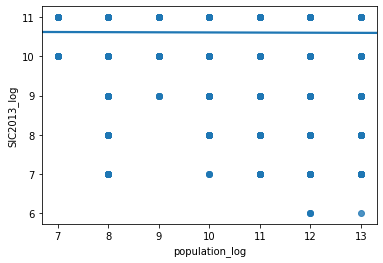

In [12]:
sns.regplot(x='population_log',y='SIC2013_log',data=df);

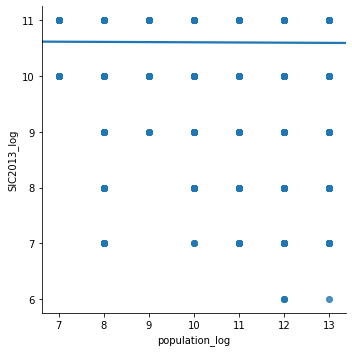

In [13]:
sns.lmplot(x='population_log',y='SIC2013_log',data=df);

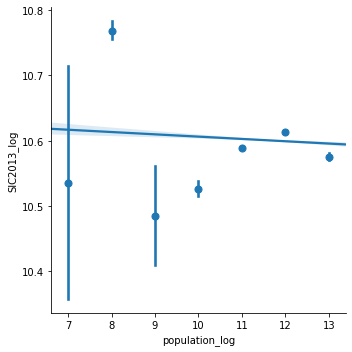

In [14]:
sns.lmplot(x='population_log',y='SIC2013_log',data=df,x_estimator=np.mean);

/Users/jyothigupta/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


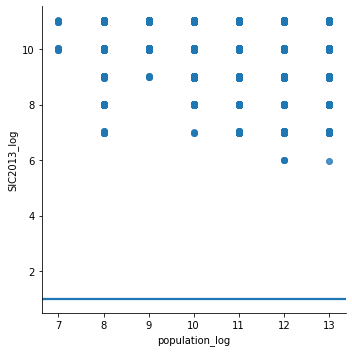

In [16]:
sns.lmplot(x='population_log',y='SIC2013_log',data=df,logistic=True, y_jitter =.03);

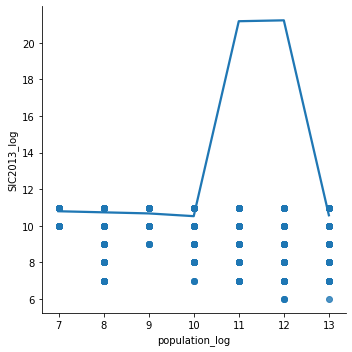

In [17]:
sns.lmplot(x='population_log',y='SIC2013_log',data=df,lowess=True);

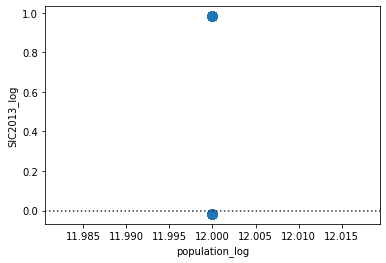

In [20]:
sns.residplot(x='population_log',y='SIC2013_log',data=df.query('company2013'),scatter_kws={'s':80});

/Users/jyothigupta/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3091: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  new_data = self.loc[res]


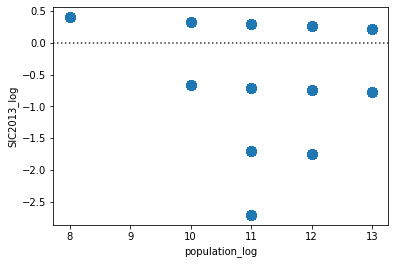

In [21]:
sns.residplot(x='population_log',y='SIC2013_log',data=df.query('population'),scatter_kws={'s':80});

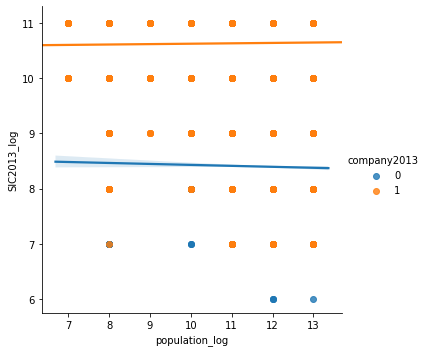

In [23]:
sns.lmplot(x='population_log',y='SIC2013_log',hue='company2013',data=df);

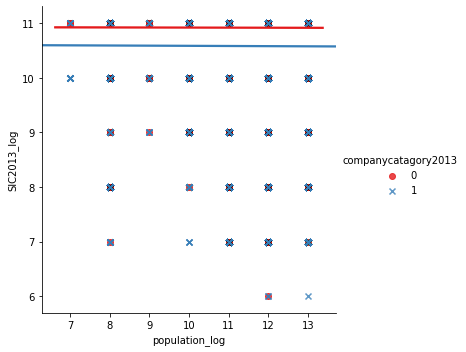

In [24]:
sns.lmplot(x='population_log',y='SIC2013_log',hue='companycatagory2013',data=df,
          markers=['o','x'],palette='Set1');

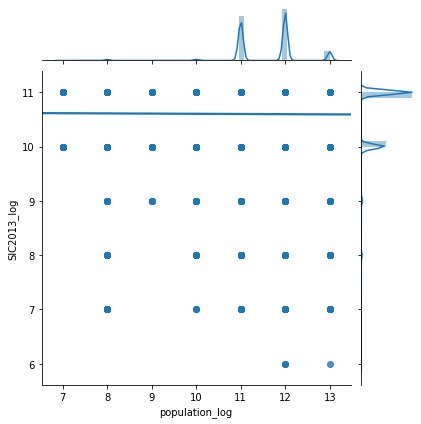

In [27]:
sns.jointplot(x='population_log',y='SIC2013_log',data=df, kind='reg');

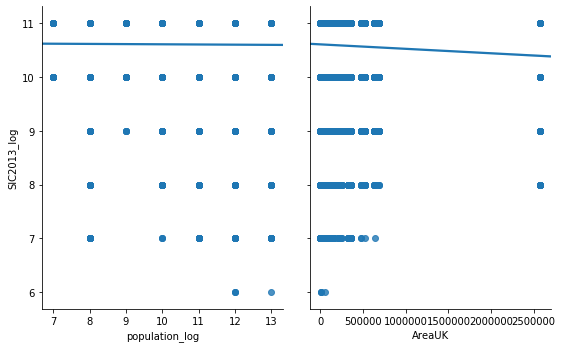

In [32]:
sns.pairplot(df, x_vars=['population_log','AreaUK'],y_vars=['SIC2013_log'], height=5,aspect=.8,kind='reg');

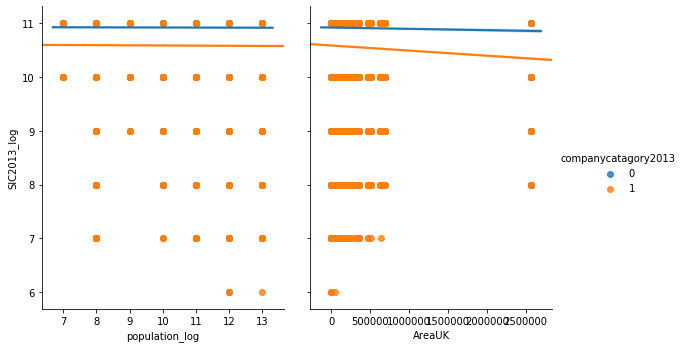

In [33]:
sns.pairplot(df, x_vars=['population_log','AreaUK'],y_vars=['SIC2013_log'],hue='companycatagory2013', height=5,aspect=.8,kind='reg');

In [34]:
# Digital technologies
sic_digital = [26110,26120,26200,26400,26511,26512,26800,33130,
                58210,58290,62011,62012,62020,62030,62090,63110,
                63120,95110]
# Life Sciences and healthcare
sic_science = [21100,21200,26600,26701,32500,72110,75000,86101,
                86102,86210,86220,86230,86900]
# Publishing and broadcasting
sic_publishing = [26301,26309,26702,58110,58120,58130,58141,58142,
                   58190,59111,59112,59113,59120,59131,59132,59133,
                   59140,59200,60100,60200,61100,61200, 61300,61900,
                   63910,63990,73110,73120,73200,74100,74201,74202,
                   74203,74209,95120]
# Other scientific activities of manufacturing
sic_otherScManuf = [19201,19209,20110,20120,20130,95210,95220,95250,
                     20140,20150,20160,20170,20200,20301,20302,20411,
                     20412,20420,20510,20520,20530,20590,20600,25210,
                     25300,25400,26513,26514,26520,27110,27120,27200,
                     27310,27320,27330,27400,27510,27520,27900,28110,
                     28120,28131,28132,28140,28150,28210,28220,28230,
                     28240,28250,28290,28301,28302,28410,28490,28910,
                     28921,28922,28923,28930,28940,28950,28960,28990,
                     29100,29201,29202,29203,29310,29320,30110,30120,
                     30200,30300,30400,30910,30920,30990,32120,32401,
                     33120,33140,33150,33160,33170]
# Other scientific activity services
sic_otherScServices = [51101,51102,51210,51220,71111,71112,71121,71122,
                        71129,71200,72190,72200,74901,74902,85410,85421,
                        85422]
# Food and accomodation
sic_food = [55100,55201,55202,55209,55300, 56101,56102,56103,
             56210,56290,56301,56302]
# Entertainment
sic_entertainment = [59140, 82301,82302, 90010,91011,91012,91020,91030,
                      91040,92000,93110, 93120,93130,93191,93199, 93020]
# Retail except retail trade of motor vehicles
sic_retail = [47190,47990,47290,47789,47782,47810,47890,47820,
               47781,47110,47791,47430,47300,47250,47610,47240,
               47530,47710,47410,47750,47540,47230,47760,47721,
               47210,47599,47650,47520,47741,47722,47220,47749,
               47421,47630,47591,47620,47799,47640,47429,47510,
               47260,47770,47910]

In [36]:
model=ols('AreaUK ~ population_log + SIC2013_log',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 AreaUK   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1053.
Date:                Sat, 20 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:27:06   Log-Likelihood:            -1.0926e+07
No. Observations:              815302   AIC:                         2.185e+07
Df Residuals:                  815299   BIC:                         2.185e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3344.5804   4179.836     -0.

In [39]:
model1=ols('SIC2013_log ~ population_log + population',data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            SIC2013_log   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     73.00
Date:                Sat, 20 Jul 2019   Prob (F-statistic):           1.99e-32
Time:                        15:29:23   Log-Likelihood:            -7.5014e+05
No. Observations:              815302   AIC:                         1.500e+06
Df Residuals:                  815299   BIC:                         1.500e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.7680      0.015    702.

KeyboardInterrupt: 

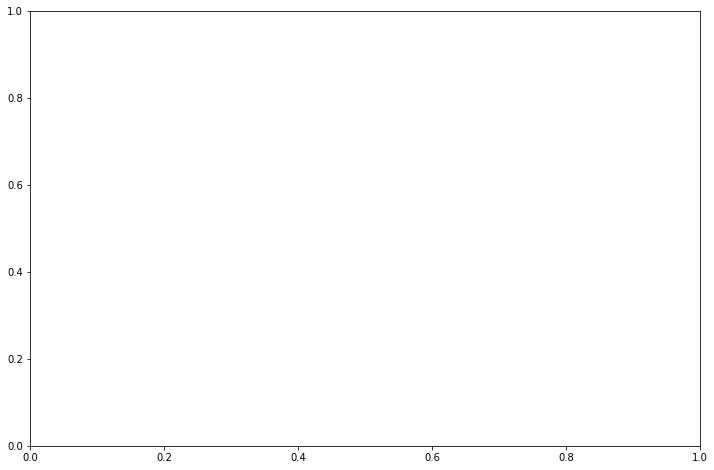

In [40]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model1, ax=ax, criterion="cooks")

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_ccpr(model, "SIC2013_log", ax=ax)

In [ ]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(model, fig=fig)

In [ ]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, "population_log", fig=fig)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(prestige_model, "population_log", ax=ax)

In [ ]:
me_model = ols("population_log ~ AreaUK + SIC2013_log + hs_grad + single", data=dta).fit()
print(me_model.summary())